In [12]:
import imaplib #Library to scrape mails

In [13]:
# Connect to the email server
imap_server = imaplib.IMAP4_SSL('imap.gmail.com')


In [14]:
username = 'insert your email username here'
password = 'insert your password here'
imap_server.login(username, password)

('OK', [b'mijansamuel@gmail.com authenticated (Success)'])

In [15]:
# Select the mailbox/folder you want to scrape emails from
imap_server.select('INBOX')

('OK', [b'10500'])

In [16]:
# Search for emails containing specific words in the body
status, data = imap_server.search(None, 'BODY "Unfortunately"')

In [17]:
# Search for emails containing specific words in the body
status_1, data_1 = imap_server.search(None, 'BODY "unfortunately"' or 'BODY "sorry"')

In [18]:
# Get a list of email IDs
email_ids = data[0].split()

In [19]:
email_ids_1 = data_1[0].split()

In [13]:
len(email_ids_1)

64

In [28]:
len(email_ids)

64

In [14]:
# Iterate through each email ID and fetch the email data
for email_id in email_ids:
    status, data = imap_server.fetch(email_id, '(RFC822)')
    email_data = data[0][1]  # Raw email data

    # Process the email data as per your requirements
    # Here you can extract the necessary information from the email, such as sender, subject, body, etc.

In [20]:
# Iterate through each email ID and fetch the email data
mail_dat = []
for email_id in email_ids_1:
    status, data = imap_server.fetch(email_id, '(RFC822)')
    mail_dat.append(data)  # Raw email data

    # Process the email data as per your requirements
    # Here you can extract the necessary information from the email, such as sender, subject, body, etc.

In [21]:
type(mail_dat)

list

In [22]:

# Close the connection to the email server
imap_server.logout()


('BYE', [b'LOGOUT Requested'])

In [23]:
import email

In [24]:
subject = []
sender = []
body = []
date = []
for msg in mail_dat[::-1]:
    for response_part in msg:
        if type(response_part) is tuple:
            my_msg = email.message_from_bytes((response_part[1]))
            subject.append(my_msg['subject'])
            sender.append(my_msg['from'])
            date.append(my_msg['date'])
            for part in my_msg.walk():
                if part.get_content_type() == 'text/plain':
                    body.append(part.get_payload())

In [25]:
len(subject), len(sender), len(body), len(date)

(64, 64, 60, 64)

In [44]:
type(body)

list

In [26]:
if len(body) < len(sender):
    body.extend([None] * (len(sender)-len(body)))

In [27]:
len(body)

64

In [28]:
import pandas as pd

In [29]:
# Create a DATAFRAME for email data
columns = ['Sender', 'Date', 'Subject', 'Message']
df = pd.DataFrame(list(zip(sender,date,subject,body)),
                 columns = columns)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Sender   64 non-null     object
 1   Date     64 non-null     object
 2   Subject  64 non-null     object
 3   Message  60 non-null     object
dtypes: object(4)
memory usage: 2.1+ KB


In [31]:
df.to_csv('my_rejection_mail_extract.csv', index=False)

In [32]:
check = pd.read_csv('my_rejection_mail_extract.csv')



In [33]:
check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Sender   64 non-null     object
 1   Date     64 non-null     object
 2   Subject  64 non-null     object
 3   Message  60 non-null     object
dtypes: object(4)
memory usage: 2.1+ KB


In [34]:
check.describe()

,Sender,Date,Subject,Message
count,64,64,64,60
unique,37,64,62,58
top,"""FlexJobs"" <newsletter@flexjobs.com>","Thu, 29 Jun 2023 21:53:44 +0000",Your application for Junior Data Engineer (m/f...,"Dear Samuel,\r\n\r\nThank you for your applica..."
freq,9,1,2,2


In [35]:
# Searching for mails that only have the word "unfortunately"
index_drop = check[check['Message'].str.contains('Quora',na = False)].index

In [36]:
rej_mail_df = check.drop(index_drop, axis=0)

In [37]:
rej_mail_df_1 = rej_mail_df.dropna()

In [38]:
newsletter_drop = rej_mail_df_1[rej_mail_df_1['Sender'].str.contains('<newsletter@flexjobs.com>',na = False)].index

In [39]:
rej_mail_df_2 = rej_mail_df_1.drop(newsletter_drop, axis=0)

In [40]:
rej_mail_df_2

,Sender,Date,Subject,Message
0,no-reply-recruiting@spacex.com,"Thu, 29 Jun 2023 21:53:44 +0000",Your application for Regional Sales Manager - ...,Thank you for your interest in a career with S...
1,no-reply@remote.com,"Tue, 27 Jun 2023 12:27:12 +0000",Important information about your application t...,"Hi Samuel,\r\n\r\nThank you for your interest ..."
2,Spruce Holdings <no-reply@hire.lever.co>,"Fri, 23 Jun 2023 18:10:13 +0000",Your Job Application to Spruce,Samuel\r\n\r\n\r\nWe really appreciate you tim...
3,no-reply@nethermind.io,"Tue, 20 Jun 2023 22:38:43 +0000",Information about your application - Nethermin...,"Hi Samuel,\r\n\r\nThank you for taking the tim..."
4,"""FlexJobs"" <feedback@email.flexjobs.com>","Wed, 14 Jun 2023 15:10:27 +0000",12 Flexible Companies That Help Pay for Your V...,The FlexJobs Weekly Newsletter=0A-------------...
5,Data2Bots Careers <careers@data2bots-team.fres...,"Thu, 01 Jun 2023 13:07:40 +0100",Invitation to Register for Data2Bots Academy,"Hi Samuel,\r\n\r\nThank you for applying for t..."
6,Manreet Johal <manreet.johal@farfetch.com>,"Tue, 30 May 2023 10:03:24 -0400",FARFETCH Junior Data Engineer Hiring Update,Kaggle\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nHi M...
7,Kaggle <noreply@kaggle.com>,"Wed, 10 May 2023 13:50:32 -0700",Competition Launch: Google Research - Identify...,This email is not formatted for viewing in a t...
8,"""The Sunday Signal, from TradePub.com"" <Offers...","Sun, 2 Apr 2023 04:30:01 -0700",How to Make Difficult Decisions,---------------------------=0A Dear Samuel Amo...
9,"""FlexJobs"" <feedback@email.flexjobs.com>","Wed, 15 Feb 2023 16:43:48 +0000",100 Companies to Watch for Remote Jobs in 2023...,---------------------------=0A Dear Samuel Amo...


In [41]:
newsletter_drop2 = rej_mail_df_2[rej_mail_df_2['Sender'].str.contains('<feedback@email.flexjobs.com>',na = False)].index

In [42]:
rej_mail_df_3 = rej_mail_df_2.drop(newsletter_drop2, axis=0)

In [43]:
drop3 = rej_mail_df_3[rej_mail_df_3['Sender'].str.contains('Quora',na = False)].index

In [44]:
rej_mail_df_4 = rej_mail_df_3.drop(drop3, axis=0)

In [45]:
rej_mail_df_4

,Sender,Date,Subject,Message
0,no-reply-recruiting@spacex.com,"Thu, 29 Jun 2023 21:53:44 +0000",Your application for Regional Sales Manager - ...,Thank you for your interest in a career with S...
1,no-reply@remote.com,"Tue, 27 Jun 2023 12:27:12 +0000",Important information about your application t...,"Hi Samuel,\r\n\r\nThank you for your interest ..."
2,Spruce Holdings <no-reply@hire.lever.co>,"Fri, 23 Jun 2023 18:10:13 +0000",Your Job Application to Spruce,Samuel\r\n\r\n\r\nWe really appreciate you tim...
3,no-reply@nethermind.io,"Tue, 20 Jun 2023 22:38:43 +0000",Information about your application - Nethermin...,"Hi Samuel,\r\n\r\nThank you for taking the tim..."
5,Data2Bots Careers <careers@data2bots-team.fres...,"Thu, 01 Jun 2023 13:07:40 +0100",Invitation to Register for Data2Bots Academy,"Hi Samuel,\r\n\r\nThank you for applying for t..."
6,Manreet Johal <manreet.johal@farfetch.com>,"Tue, 30 May 2023 10:03:24 -0400",FARFETCH Junior Data Engineer Hiring Update,Kaggle\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nHi M...
7,Kaggle <noreply@kaggle.com>,"Wed, 10 May 2023 13:50:32 -0700",Competition Launch: Google Research - Identify...,This email is not formatted for viewing in a t...
8,"""The Sunday Signal, from TradePub.com"" <Offers...","Sun, 2 Apr 2023 04:30:01 -0700",How to Make Difficult Decisions,---------------------------=0A Dear Samuel Amo...
11,no-reply@us.greenhouse-mail.io,"Wed, 01 Feb 2023 23:13:32 +0000",Regarding Your Application to Ripple,"Hi Samuel,\r\n\r\nThank you for applying at Re..."
12,Smruti Mishra <smruti.mishra@remerge.io>,"Fri, 13 Jan 2023 15:00:09 +0000",About your application to Remerge,Dear Samuel.\r\nI hope you are well.\r\n\r\nWe...


In [46]:
drop4 = rej_mail_df_4[rej_mail_df_4['Sender'].str.contains('<mailer@1xbet.com>',na = False)].index

In [47]:
rej_mail_df_5 = rej_mail_df_4.drop(drop4, axis=0)

In [49]:
rej_mail_df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 55
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Sender   36 non-null     object
 1   Date     36 non-null     object
 2   Subject  36 non-null     object
 3   Message  36 non-null     object
dtypes: object(4)
memory usage: 1.4+ KB


In [50]:
rej_mail_df_5

,Sender,Date,Subject,Message
0,no-reply-recruiting@spacex.com,"Thu, 29 Jun 2023 21:53:44 +0000",Your application for Regional Sales Manager - ...,Thank you for your interest in a career with S...
1,no-reply@remote.com,"Tue, 27 Jun 2023 12:27:12 +0000",Important information about your application t...,"Hi Samuel,\r\n\r\nThank you for your interest ..."
2,Spruce Holdings <no-reply@hire.lever.co>,"Fri, 23 Jun 2023 18:10:13 +0000",Your Job Application to Spruce,Samuel\r\n\r\n\r\nWe really appreciate you tim...
3,no-reply@nethermind.io,"Tue, 20 Jun 2023 22:38:43 +0000",Information about your application - Nethermin...,"Hi Samuel,\r\n\r\nThank you for taking the tim..."
5,Data2Bots Careers <careers@data2bots-team.fres...,"Thu, 01 Jun 2023 13:07:40 +0100",Invitation to Register for Data2Bots Academy,"Hi Samuel,\r\n\r\nThank you for applying for t..."
6,Manreet Johal <manreet.johal@farfetch.com>,"Tue, 30 May 2023 10:03:24 -0400",FARFETCH Junior Data Engineer Hiring Update,Kaggle\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nHi M...
7,Kaggle <noreply@kaggle.com>,"Wed, 10 May 2023 13:50:32 -0700",Competition Launch: Google Research - Identify...,This email is not formatted for viewing in a t...
8,"""The Sunday Signal, from TradePub.com"" <Offers...","Sun, 2 Apr 2023 04:30:01 -0700",How to Make Difficult Decisions,---------------------------=0A Dear Samuel Amo...
11,no-reply@us.greenhouse-mail.io,"Wed, 01 Feb 2023 23:13:32 +0000",Regarding Your Application to Ripple,"Hi Samuel,\r\n\r\nThank you for applying at Re..."
12,Smruti Mishra <smruti.mishra@remerge.io>,"Fri, 13 Jan 2023 15:00:09 +0000",About your application to Remerge,Dear Samuel.\r\nI hope you are well.\r\n\r\nWe...


In [68]:
drop5 = rej_mail_df_5[rej_mail_df_5['Sender'].str.contains('Offers@Tradepubs.nl00.net>',na = False)].index


In [69]:
drop5

Int64Index([8, 15], dtype='int64')

In [70]:
rej_mail_df_6 = rej_mail_df_5.drop(drop5, axis=0)

In [75]:
len(rej_mail_df_6)

34

In [73]:
drop5 = rej_mail_df_6[rej_mail_df_6['Message'].str.contains('flexjob',na = False)].index

In [74]:
drop5

Int64Index([26, 27, 32, 37, 40, 52], dtype='int64')

In [76]:
rej_mail_df_6 = rej_mail_df_6.drop(drop5, axis=0)

In [77]:
len(rej_mail_df_6)

28

# EXPLORATORY DATA ANALYSIS

In [78]:
main_email_data = rej_mail_df_6.copy()

In [79]:
# Showing the first 5 rows of the dataframe .head()
main_email_data.head()

,Sender,Date,Subject,Message
0,no-reply-recruiting@spacex.com,"Thu, 29 Jun 2023 21:53:44 +0000",Your application for Regional Sales Manager - ...,Thank you for your interest in a career with S...
1,no-reply@remote.com,"Tue, 27 Jun 2023 12:27:12 +0000",Important information about your application t...,"Hi Samuel,\r\n\r\nThank you for your interest ..."
2,Spruce Holdings <no-reply@hire.lever.co>,"Fri, 23 Jun 2023 18:10:13 +0000",Your Job Application to Spruce,Samuel\r\n\r\n\r\nWe really appreciate you tim...
3,no-reply@nethermind.io,"Tue, 20 Jun 2023 22:38:43 +0000",Information about your application - Nethermin...,"Hi Samuel,\r\n\r\nThank you for taking the tim..."
5,Data2Bots Careers <careers@data2bots-team.fres...,"Thu, 01 Jun 2023 13:07:40 +0100",Invitation to Register for Data2Bots Academy,"Hi Samuel,\r\n\r\nThank you for applying for t..."


In [80]:
#Checking the data information 
main_email_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 55
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Sender   28 non-null     object
 1   Date     28 non-null     object
 2   Subject  28 non-null     object
 3   Message  28 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [81]:
# Checking the shape of the data
main_email_data.shape

(28, 4)

In [82]:
# Check fro null values 
main_email_data.isnull().sum()

Sender     0
Date       0
Subject    0
Message    0
dtype: int64

### Using Wordcloud library, we would create a visualization to see the frequent occuring words in all the email message body

In [3]:
#!pip install wordcloud

In [56]:
#importing the libraries 
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
%matplotlib inline 

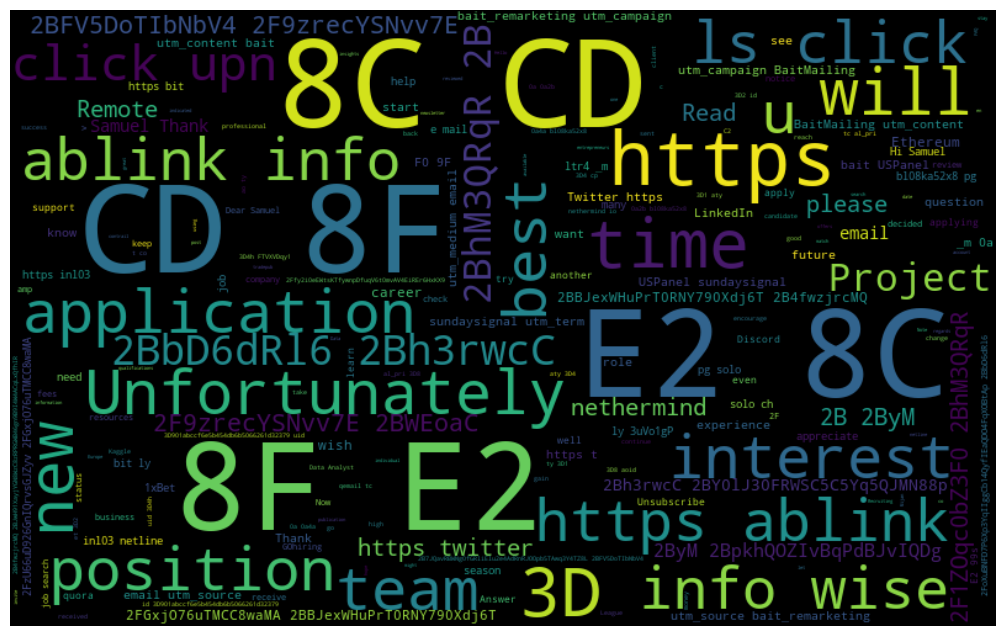

In [83]:
# Visualize the frequent words 
all_words = " ".join([sentence for sentence in main_email_data['Message']])

wordcloud= WordCloud(width=800, height=500, random_state=50, max_font_size=100).generate(all_words)
# Plot the Graph 
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

### DATA PREPROCESSING

In [84]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [85]:
# Putting all the punctuation in a list 
punctuations = [i for i in string.punctuation]

In [86]:
# Function created to remove punctuations from our text
def remove_punctuation(text):
    return ''.join([l for l in text if l not in string.punctuation])

In [87]:
main_email_data['Message'] = main_email_data['Message'].apply(remove_punctuation)

In [90]:
main_email_data['Message'][20]

'Dear Samuel\r\n\r\nThank you for your application we are happy to see you are interested in o\r\nur Project A portfolio companies\r\n\r\nWe will carefully review your application and do our best to get back to yo\r\nu as fast as possible Since we receive many applications this might take \r\nup to 10 days\r\n\r\nFeel free to reach out to us if you have any questions You can learn more\r\n about our portfolio companies here  httpswwwprojectacomenportfoli\r\no \r\n\r\nPS Eager to gain further insights into EuropeE28099s Tech Scene and ne\r\ntwork with leading experts and entrepreneurs in the VC and Startup world M\r\nake sure not to miss our annual Project A Knowledge Conference on October 7\r\nth\r\n\r\nFind out more and register for your PAKCon2022 ticket here httpsbitly\r\n3uVo1gP  httpsbitly3uVo1gP \r\n\r\nFor future emails from us please check your spam folder as well Unfortun\r\nately sometimes our emails end up there\r\n\r\nKind regards\r\nYour Project A Talent Acquisition Team\r

In [93]:
main_email_data.to_csv('rejection_mail_details.csv', index=False)

In [94]:
2+2

4